In [418]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

# get the output for all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [419]:
df=pd.read_csv(r'C:\churn_dataset.csv',skipinitialspace=True)

In [420]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [421]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [422]:
df.shape
df.size
df.info()

(7043, 21)

147903

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning

## Checking Duplicates

In [423]:
df.duplicated()
df.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

False    7043
dtype: int64

# Missing Values

In [424]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Identify the currupted dat

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [426]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [427]:
df.TotalCharges.mean()
df.TotalCharges.median()
df.TotalCharges.mode()[0]

2283.3004408418656

1397.475

20.2

In [428]:
x=df.TotalCharges.median()
df.TotalCharges.fillna(x,inplace=True)

In [429]:
df.TotalCharges[df.TotalCharges.isna()].sum()

0.0

In [430]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Out Liers

In [432]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
dtype: float64

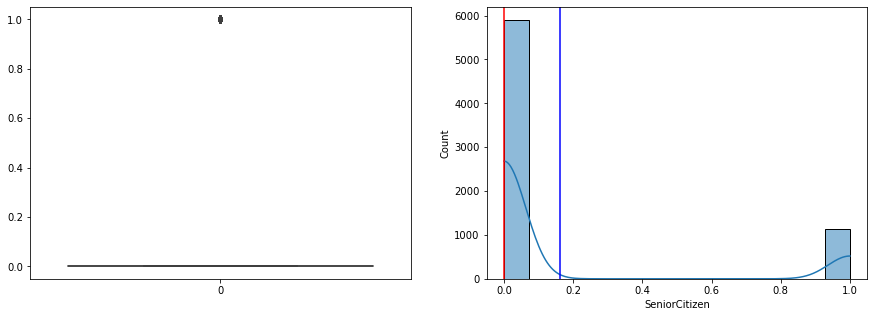

In [433]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.SeniorCitizen)

plt.subplot(122)
sns.histplot(df.SeniorCitizen,kde=True)
plt.axvline(df.SeniorCitizen.mean(), color='blue')
plt.axvline(df.SeniorCitizen.median(),color='red');

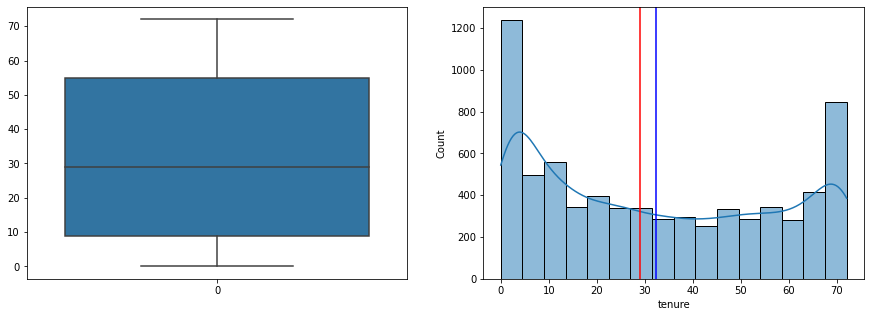

In [434]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.tenure)

plt.subplot(122)
sns.histplot(df.tenure,kde=True)
plt.axvline(df.tenure.mean(), color='blue')
plt.axvline(df.tenure.median(),color='red');

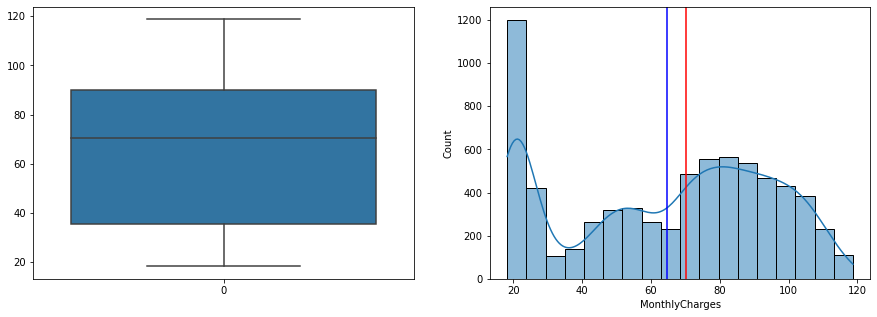

In [435]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.MonthlyCharges)

plt.subplot(122)
sns.histplot(df.MonthlyCharges,kde=True)
plt.axvline(df.MonthlyCharges.mean(), color='blue')
plt.axvline(df.MonthlyCharges.median(),color='red');

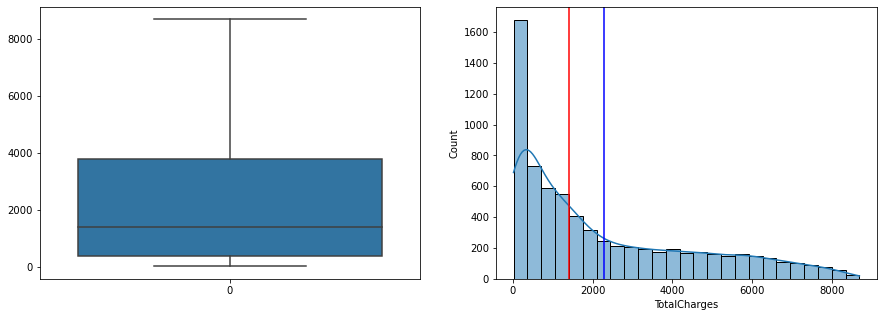

In [436]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.TotalCharges)

plt.subplot(122)
sns.histplot(df.TotalCharges,kde=True)
plt.axvline(df.TotalCharges.mean(), color='blue')
plt.axvline(df.TotalCharges.median(),color='red');

# Analysis

In [437]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


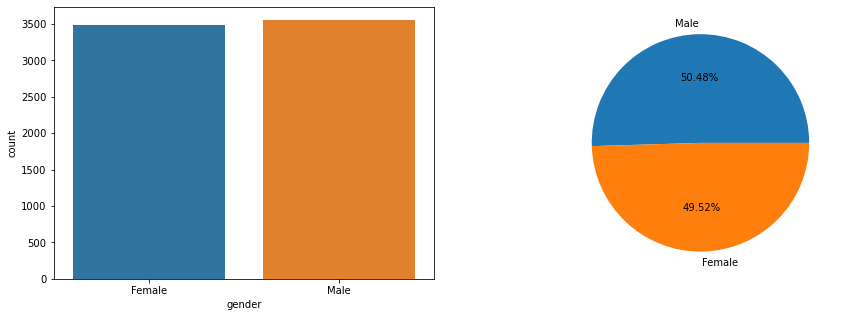

In [438]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df.gender)
plt.subplot(122)
plt.pie(df.gender.value_counts().values,labels=df.gender.value_counts().index,autopct='%.2f%%');

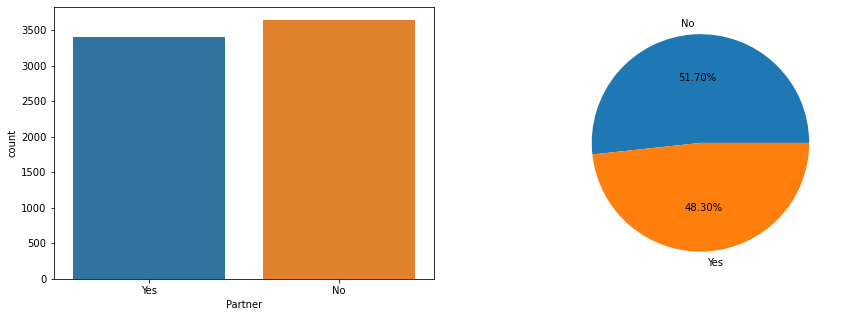

In [439]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df.Partner)
plt.subplot(122)
plt.pie(df.Partner.value_counts().values,labels=df.Partner.value_counts().index,autopct='%.2f%%');

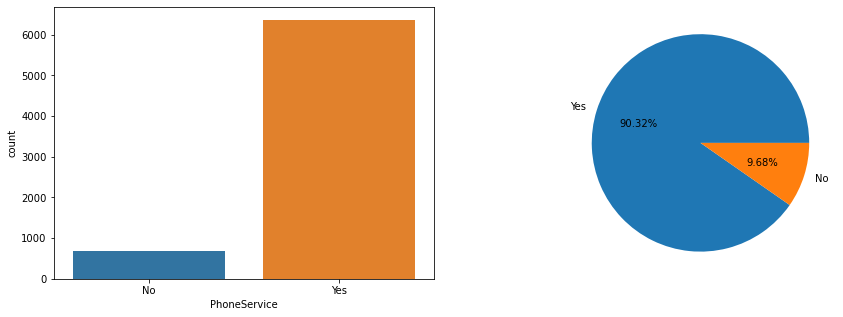

In [440]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df.PhoneService)
plt.subplot(122)
plt.pie(df.PhoneService.value_counts().values,labels=df.PhoneService.value_counts().index,autopct='%.2f%%');

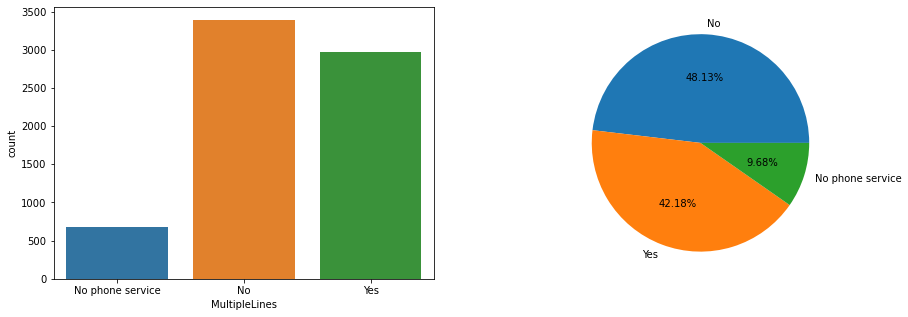

In [441]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df.MultipleLines)
plt.subplot(122)
plt.pie(df.MultipleLines.value_counts().values,labels=df.MultipleLines.value_counts().index,autopct='%.2f%%');

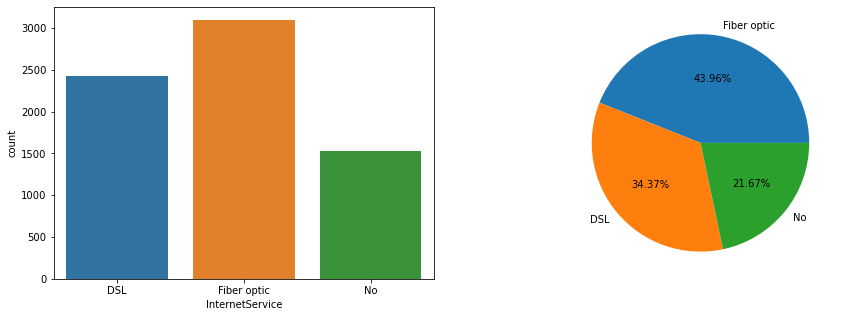

In [442]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df.InternetService)
plt.subplot(122)
plt.pie(df.InternetService.value_counts().values,labels=df.InternetService.value_counts().index,autopct='%.2f%%');

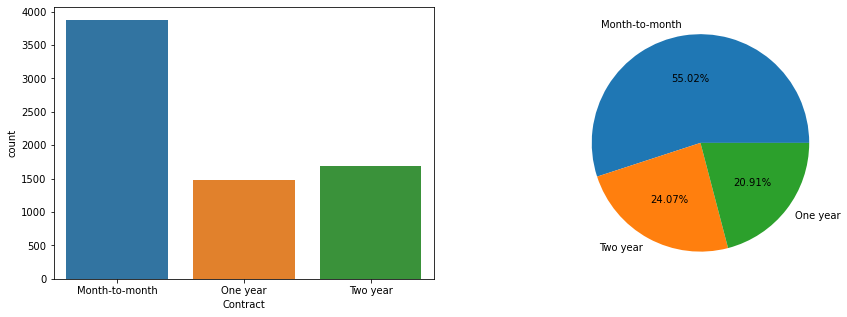

In [443]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df.Contract)
plt.subplot(122)
plt.pie(df.Contract.value_counts().values,labels=df.Contract.value_counts().index,autopct='%.2f%%');

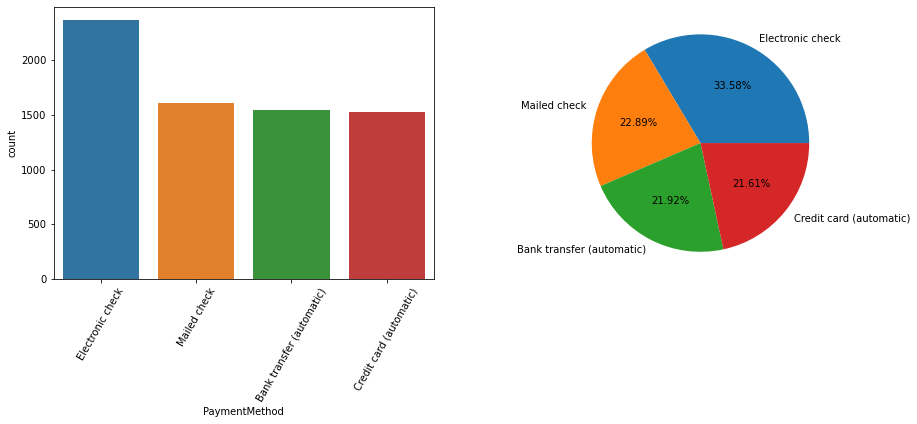

In [444]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df.PaymentMethod)
plt.xticks(rotation=60)
plt.subplot(122)
plt.pie(df.PaymentMethod.value_counts().values,labels=df.PaymentMethod.value_counts().index,autopct='%.2f%%');

<AxesSubplot:>

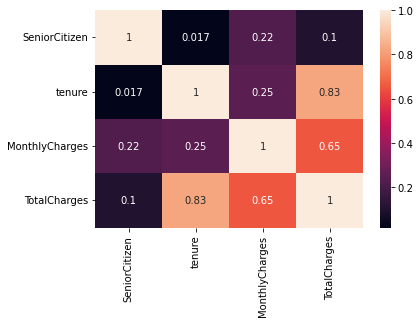

In [445]:
sns.heatmap(df.corr(),annot=True)

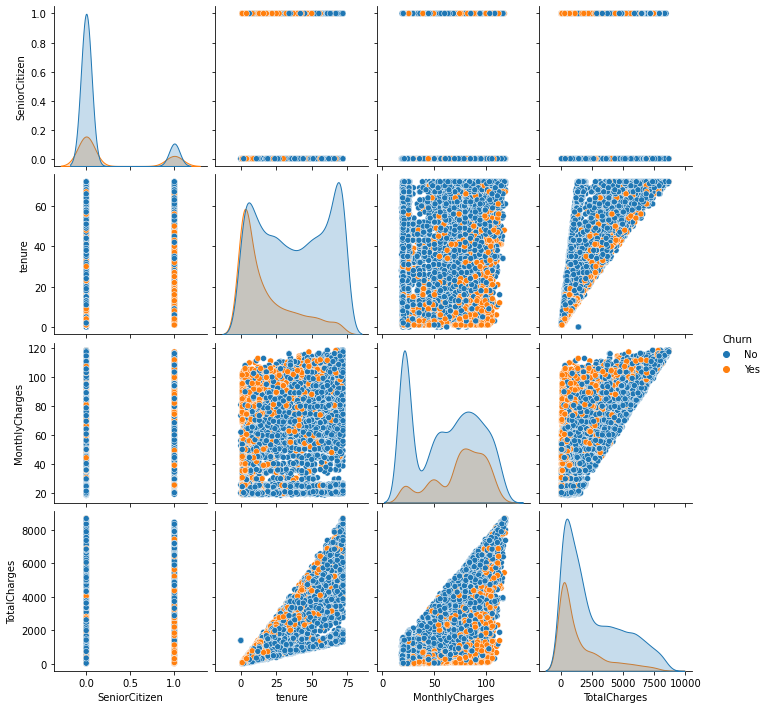

In [446]:
sns.pairplot(df,hue='Churn');

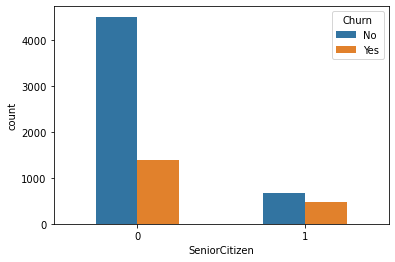

In [447]:
sns.countplot(x=df.SeniorCitizen, hue=df.Churn,width=0.5);

* By observing above countplot the company needs to focus on non-SeniorCitizens.

# Data Preparation

## a.Identify the Target Variable and Splitting the Data into Train and Test

In [448]:
# install -U scikit-learn
import sklearn

print(sklearn.__version__)

1.2.1


In [449]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [450]:
# Identifying the inouts(X) and ouput(y)
y=df['Churn']
X=df[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [451]:
# Data-preprocessing: Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75,random_state = 0)

In [452]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3296,Female,0,No,No,24,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),49.30,1233.25
6397,Male,1,No,No,54,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic),65.25,3529.95
6043,Male,0,No,No,3,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,40.15,130.75
5309,Female,0,Yes,No,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1278.80
3000,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55


In [453]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


# b. Separating Categorical and Numerical Columns:

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [455]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3296,Female,No,No,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic)
6397,Male,No,No,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic)
6043,Male,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check
5309,Female,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
3000,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check


In [456]:
X_train_num = X_train.select_dtypes(include=['int64','float64'])

X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3296,0,24,49.30,1233.25
6397,1,54,65.25,3529.95
6043,0,3,40.15,130.75
5309,0,61,20.25,1278.80
3000,0,12,84.45,1059.55


## c. Scaling the Numerical Features

In [457]:
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3296,0,24,49.30,1233.25
6397,1,54,65.25,3529.95
6043,0,3,40.15,130.75
5309,0,61,20.25,1278.80
3000,0,12,84.45,1059.55


In [458]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = X_train_num.columns,
                                   index = X_train_num.index)
X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3296,-0.435476,-0.340191,-0.514314,-0.461523
6397,2.296336,0.883210,0.017840,0.555935
6043,-0.435476,-1.196572,-0.819594,-0.949940
5309,-0.435476,1.168670,-1.483535,-0.441344
3000,-0.435476,-0.829552,0.658427,-0.538474


In [459]:
X_train_num.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,0.159409,32.342105,64.715288,2275.042721
std,0.366092,24.524128,29.975356,2257.506060
min,0.000000,0.000000,18.250000,18.850000
25%,0.000000,9.000000,35.750000,412.525000
50%,0.000000,29.000000,70.300000,1397.475000
75%,0.000000,55.000000,89.800000,3769.925000
max,1.000000,72.000000,118.650000,8684.800000


## d. Applying OnHotEncoding on Categorical Columns

In [460]:
X_train_cat=X_train.select_dtypes(include=['object'])
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3296,Female,No,No,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic)
6397,Male,No,No,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic)
6043,Male,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check
5309,Female,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
3000,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check


In [461]:
X_train_cat['gender'].value_counts(normalize=True)

Female    0.502272
Male      0.497728
Name: gender, dtype: float64

In [462]:
X_train_cat['Partner'].value_counts(normalize=True)

No     0.515524
Yes    0.484476
Name: Partner, dtype: float64

In [463]:
X_train_cat['Dependents'].value_counts(normalize=True)

No     0.698788
Yes    0.301212
Name: Dependents, dtype: float64

In [464]:
X_train_cat['PhoneService'].value_counts(normalize=True)

Yes    0.904014
No     0.095986
Name: PhoneService, dtype: float64

In [465]:
X_train_cat['MultipleLines'].value_counts(normalize=True)

No                  0.482772
Yes                 0.421242
No phone service    0.095986
Name: MultipleLines, dtype: float64

In [466]:
X_train_cat['InternetService'].value_counts(normalize=True)

Fiber optic    0.439606
DSL            0.343809
No             0.216585
Name: InternetService, dtype: float64

In [467]:
X_train_cat['OnlineSecurity'].value_counts(normalize=True)

No                     0.494888
Yes                    0.288527
No internet service    0.216585
Name: OnlineSecurity, dtype: float64

In [468]:
X_train_cat['OnlineBackup'].value_counts(normalize=True)

No                     0.439228
Yes                    0.344188
No internet service    0.216585
Name: OnlineBackup, dtype: float64

In [469]:
X_train_cat['DeviceProtection'].value_counts(normalize=True)

No                     0.441499
Yes                    0.341916
No internet service    0.216585
Name: DeviceProtection, dtype: float64

In [470]:
X_train_cat['TechSupport'].value_counts(normalize=True)

No                     0.498107
Yes                    0.285309
No internet service    0.216585
Name: TechSupport, dtype: float64

In [471]:
X_train_cat['StreamingTV'].value_counts(normalize=True)

No                     0.400606
Yes                    0.382810
No internet service    0.216585
Name: StreamingTV, dtype: float64

In [472]:
X_train_cat['StreamingMovies'].value_counts(normalize=True)

No                     0.397009
Yes                    0.386407
No internet service    0.216585
Name: StreamingMovies, dtype: float64

In [473]:
X_train_cat['Contract'].value_counts(normalize=True)

Month-to-month    0.553200
Two year          0.235706
One year          0.211094
Name: Contract, dtype: float64

In [474]:
X_train_cat['PaperlessBilling'].value_counts(normalize=True)

Yes    0.597501
No     0.402499
Name: PaperlessBilling, dtype: float64

In [475]:
X_train_cat['PaymentMethod'].value_counts(normalize=True)

Electronic check             0.334532
Mailed check                 0.230973
Bank transfer (automatic)    0.219992
Credit card (automatic)      0.214502
Name: PaymentMethod, dtype: float64

In [476]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first',sparse=False)

X_train_cat_ohe=pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)
X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6397,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6043,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5309,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3000,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## f. Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [477]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_ohe],axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3296,-0.435476,-0.340191,-0.514314,-0.461523,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6397,2.296336,0.883210,0.017840,0.555935,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6043,-0.435476,-1.196572,-0.819594,-0.949940,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5309,-0.435476,1.168670,-1.483535,-0.441344,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3000,-0.435476,-0.829552,0.658427,-0.538474,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## g.Preparing test Data

In [478]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2200,Female,0,No,No,19,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25
4627,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.50
3225,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85
2828,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,20.45
3768,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.40


In [479]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 2200 to 450
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1761 non-null   object 
 1   SeniorCitizen     1761 non-null   int64  
 2   Partner           1761 non-null   object 
 3   Dependents        1761 non-null   object 
 4   tenure            1761 non-null   int64  
 5   PhoneService      1761 non-null   object 
 6   MultipleLines     1761 non-null   object 
 7   InternetService   1761 non-null   object 
 8   OnlineSecurity    1761 non-null   object 
 9   OnlineBackup      1761 non-null   object 
 10  DeviceProtection  1761 non-null   object 
 11  TechSupport       1761 non-null   object 
 12  StreamingTV       1761 non-null   object 
 13  StreamingMovies   1761 non-null   object 
 14  Contract          1761 non-null   object 
 15  PaperlessBilling  1761 non-null   object 
 16  PaymentMethod     1761 non-null   object

In [480]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
2200,Female,No,No,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check
4627,Male,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic)
3225,Female,No,No,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
2828,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
3768,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [481]:
X_test_num = X_test.select_dtypes(include=['int64','float64'])
X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2200,0,19,58.20,1045.25
4627,0,60,116.60,7049.50
3225,0,13,71.95,923.85
2828,0,1,20.45,20.45
3768,0,55,77.75,4266.40


In [482]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4627,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3225,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2828,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3768,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [483]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                   columns = X_test_num.columns,
                                   index = X_test_num.index)
X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2200,-0.435476,-0.544091,-0.217375,-0.544809
4627,-0.435476,1.127890,1.731076,2.115126
3225,-0.435476,-0.788772,0.241378,-0.598590
2828,-0.435476,-1.278132,-1.476862,-0.998804
3768,-0.435476,0.923990,0.434889,0.882188


In [484]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat_ohe],axis=1)
X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,-0.435476,-0.544091,-0.217375,-0.544809,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4627,-0.435476,1.127890,1.731076,2.115126,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3225,-0.435476,-0.788772,0.241378,-0.598590,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2828,-0.435476,-1.278132,-1.476862,-0.998804,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3768,-0.435476,0.923990,0.434889,0.882188,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# Logistic Regression

In [485]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

### Prediction

In [486]:
y_test_pred = classifier.predict(X_test_transformed)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

<AxesSubplot:xlabel='Churn', ylabel='Count'>

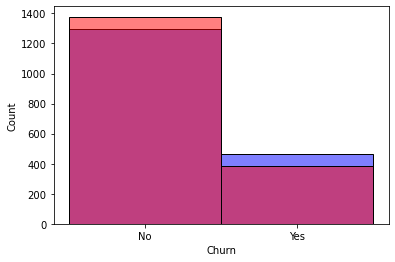

In [487]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

### Evalution

In [488]:
# calculate accuracy of class predictions
from sklearn import metrics

Logistic_Regression=metrics.accuracy_score(y_test, y_test_pred)
Logistic_Regression

0.7978421351504826

# DT Classifier

In [489]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

### Prediction

In [490]:
y_test_pred = classifier.predict(X_test_transformed)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

<AxesSubplot:xlabel='Churn', ylabel='Count'>

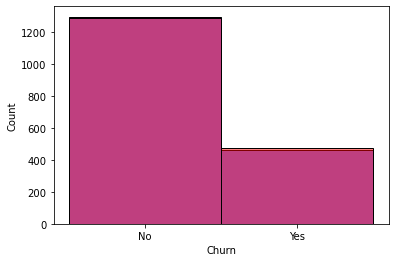

In [491]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

### Evaluation

In [492]:
DT_Classifier=metrics.accuracy_score(y_test, y_test_pred)
DT_Classifier

0.7257240204429302

## KNN Classifier

In [493]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

### Prediction

In [516]:
y_test_pred = classifier.predict(X_test_transformed)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

<AxesSubplot:xlabel='Churn', ylabel='Count'>

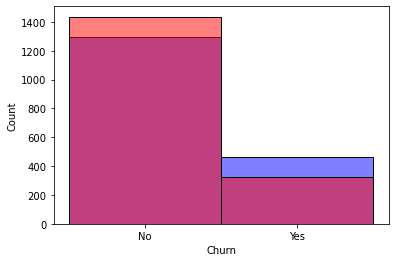

In [517]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

### Evaluation

In [496]:
KNN_Classifier=metrics.accuracy_score(y_test, y_test_pred)
KNN_Classifier

0.7257240204429302

## Random Forest Classifier

In [497]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

### Prediction

In [498]:
y_test_pred = classifier.predict(X_test_transformed)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

<AxesSubplot:xlabel='Churn', ylabel='Count'>

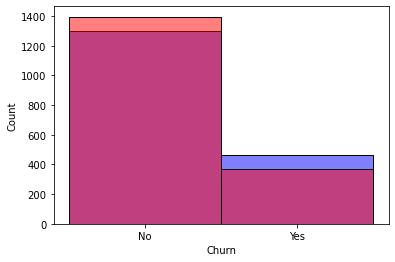

In [499]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

### Evaluation

In [500]:
Random_Forest_Classifier=metrics.accuracy_score(y_test, y_test_pred)
Random_Forest_Classifier

0.7768313458262351

## Support vector Machines 

In [501]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

### Prediction 

<AxesSubplot:xlabel='Churn', ylabel='Count'>

<AxesSubplot:xlabel='Churn', ylabel='Count'>

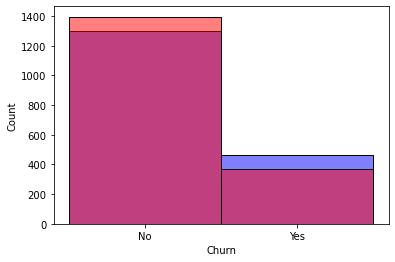

In [502]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [503]:
y_test_pred = classifier.predict(X_test_transformed)

### Evaluation

In [504]:
Support_vector_Machines=metrics.accuracy_score(y_test, y_test_pred)
Support_vector_Machines

0.7864849517319704

## Gradient Decision Boosting Tree

In [505]:
from sklearn.ensemble import GradientBoostingClassifier
Classifier = GradientBoostingClassifier()
Classifier.fit(X_train_transformed,y_train)

GradientBoostingClassifier()

### Prediction

In [506]:
y_test_pred = classifier.predict(X_test_transformed)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

<AxesSubplot:xlabel='Churn', ylabel='Count'>

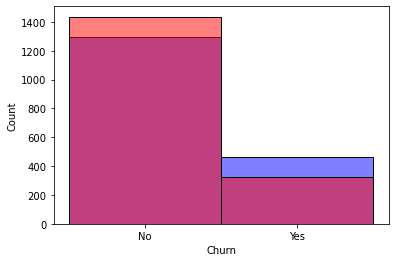

In [507]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

### Evalaution

In [508]:
Gradient_Decision_Boosting_Tree=metrics.accuracy_score(y_test, y_test_pred)
Gradient_Decision_Boosting_Tree

0.7864849517319704

# AdaBoost Classifier

In [509]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train_transformed,y_train)

AdaBoostClassifier()

### Prediction

In [510]:
y_test_pred = classifier.predict(X_test_transformed)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

<AxesSubplot:xlabel='Churn', ylabel='Count'>

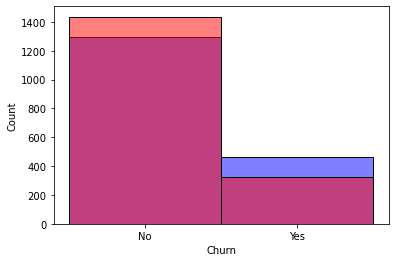

In [511]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

### Evaluation

In [512]:
AdaBoost_Classifier=metrics.accuracy_score(y_test, y_test_pred)
AdaBoost_Classifier

0.7864849517319704

In [513]:
data=[['Logistic Regression',Logistic_Regression],
       ['DT Classifier',DT_Classifier],
       ['KNN Classifier',KNN_Classifier],
       ['Random Forest Classifier',Random_Forest_Classifier],
       ['Support vector Machines',Support_vector_Machines],
       ['Gradient Decision Boosting Tree',Gradient_Decision_Boosting_Tree],
     ['AdaBoost Classifier',AdaBoost_Classifier]]

result=pd.DataFrame(data,columns = ['Algorithms','Accuracy_score'])

In [514]:
result

,Algorithms,Accuracy_score
0,Logistic Regression,0.797842
1,DT Classifier,0.725724
2,KNN Classifier,0.725724
3,Random Forest Classifier,0.776831
4,Support vector Machines,0.786485
5,Gradient Decision Boosting Tree,0.786485
6,AdaBoost Classifier,0.786485


<AxesSubplot:xlabel='Accuracy_score', ylabel='Algorithms'>

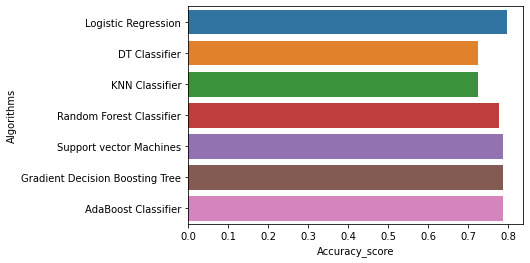

In [515]:
sns.barplot(y=result.Algorithms,x=result.Accuracy_score)

# Conclusion

* By observing all the algorithms `Logistic Regression` is best model for Churn Prediction.
* because `Logistic Regression` is giving more accuracy score `0.797842` which is approximately `79.7%`.